# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**

Dataset feature description

 - child mort - Death of children under 5 years of age per 1000 live births

- exports - Exports of goods and services per capita. Given as %age of the GDP per capita
- health - Total health spending per capita. Given as %age of GDP per capita
- import - Imports of goods and services per capita. Given as %age of the GDP per capita
- income - Net income per person
- inflation - The measurement of the annual growth rate of the Total GDP
- life_expec - The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp - The GDP per capita. Calculated as the Total GDP divided by the total population.

In [27]:
import kagglehub
import os
import pandas as pd
import plotly.express as px

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [ ]:
# put your answer here
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [ ]:
# put your answer here
df.shape

(167, 10)

Show summary statistics using `describe()`. `(5 pts)`

In [ ]:
# put your answer here
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [ ]:
# put your answer here
df.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [ ]:
# put your answer here
df_num = df.drop("country", axis=1)
df_num.head(30)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [ ]:
# put your answer here
standardizer = StandardScaler()
df_num["income"] = standardizer.fit_transform(df_num[["income"]])
df_num["inflation"] = standardizer.fit_transform(df_num[["inflation"]])
df_num["gdpp"] = standardizer.fit_transform(df_num[["gdpp"]])
df_num.head(20)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,-0.808245,0.157336,56.2,5.82,-0.679180
1,16.6,28.0,6.55,48.6,-0.375369,-0.312347,76.3,1.65,-0.485623
2,27.3,38.4,4.17,31.4,-0.220844,0.789274,76.5,2.89,-0.465376
3,119.0,62.3,2.85,42.9,-0.585043,1.387054,60.1,6.16,-0.516268
4,10.3,45.5,6.03,58.9,0.101732,-0.601749,76.8,2.13,-0.041817
5,14.5,18.9,8.10,16.0,0.080920,1.244725,75.8,2.37,-0.145791
6,18.1,20.8,4.40,45.3,-0.543421,-0.001123,73.3,1.69,-0.533233
7,4.8,19.8,8.73,20.9,1.261966,-0.628316,82.0,1.93,2.130699
8,4.3,51.3,11.00,47.8,1.355617,-0.655549,80.5,1.44,1.857082
9,39.2,54.3,5.88,20.7,-0.059556,0.571037,69.1,1.92,-0.389857


## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

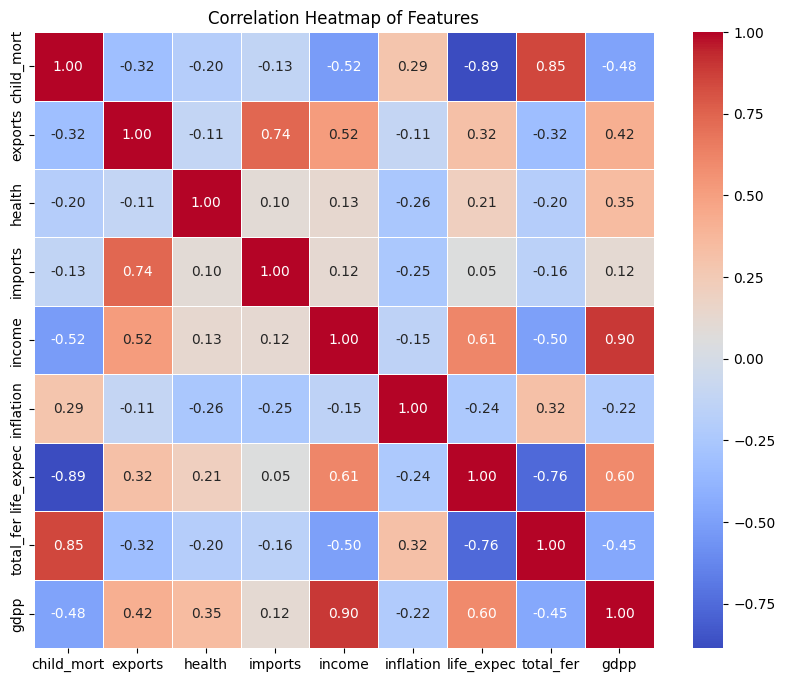

In [ ]:
# put your answer here
corr_matrix = df_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

### life_expec and child_mort are negatively correlated as for the third feature, i feel like income feature could be a correlated to both

In [131]:
# Plot 3d scatter plot
df_final = df_num[["life_expec", "health", "income"]]
df_final.head(5)

,life_expec,health,income
0,56.2,7.58,-0.808245
1,76.3,6.55,-0.375369
2,76.5,4.17,-0.220844
3,60.1,2.85,-0.585043
4,76.8,6.03,0.101732


### life_expec and income scatter plot

In [132]:
# scatter plot of life_expec and income
fig = px.scatter(df_final, x='income', y='health')
fig.show()

In [115]:
fig = px.scatter(df_final, x='income', y='life_expec')
fig.show()

In [133]:
fig = px.scatter(df_final, x='life_expec', y='health')
fig.show()

### Interactive 3d scatter plot

In [134]:
fig = px.scatter_3d(df_final, x='life_expec', y='income', z='health')
fig.show()

## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

Text(0, 0.5, 'Euclidean distance in the space with other variables')

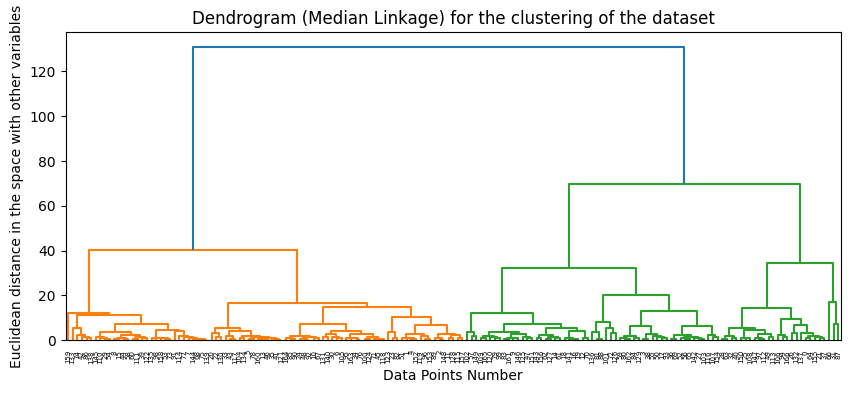

In [135]:
# put your answer here
import scipy.cluster.hierarchy as sch

Z = sch.linkage(df_final, method = 'ward')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Median Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.

I choose 3 clusters here. Mainly the high development countries: those who have high life expectancy, high health spending, and high income. Next would be medium development, which have medium respective features, and finally low development countries who has low respective features of life expectancy, health spending, and income

Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`
- Attach the cluster labels back to the original dataframe.

In [140]:
df_2feat = df_num[["income", "life_expec"]]
df_2feat.head()

cluster_H = AgglomerativeClustering(n_clusters=3, linkage = 'ward')

model_clt = cluster_H.fit(df_final)

print('Output Clusters are')
pred1 = model_clt.labels_

df_2feat["cluster"] = pred1

Output Clusters are


/tmp/ipython-input-3844767880.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
df_2feat.head()

,income,life_expec,cluster
0,-0.808245,56.2,0
1,-0.375369,76.3,1
2,-0.220844,76.5,1
3,-0.585043,60.1,2
4,0.101732,76.8,1


<Axes: title={'center': 'Scatter Plot of X vs Y Colored by Category'}, xlabel='income', ylabel='life_expec'>

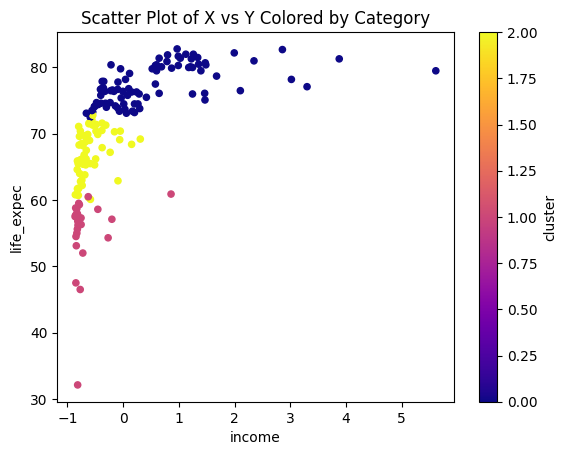

In [141]:
df_2feat.plot.scatter(
    x='income',
    y='life_expec',
    c='cluster',
    colormap='plasma',  # Optional: Choose a color map (e.g., 'plasma', 'inferno', 'viridis')
    title='Scatter Plot of X vs Y Colored by Category'
)


### 3 features life_expec, income, health


In [68]:
df_final.head()

,income,health,life_expec
0,-0.808245,7.58,56.2
1,-0.375369,6.55,76.3
2,-0.220844,4.17,76.5
3,-0.585043,2.85,60.1
4,0.101732,6.03,76.8


In [142]:
# put your answer here
cluster_H = AgglomerativeClustering(n_clusters=3, linkage = 'ward')

model_clt = cluster_H.fit(df_final)

print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)


Output Clusters are
[1 0 0 2 0 0 0 0 0 2 0 0 2 0 2 0 2 2 2 2 0 1 0 0 0 1 1 2 1 0 0 1 1 0 0 0 2
 1 2 0 1 0 0 0 0 0 0 2 0 1 2 0 2 0 0 2 2 2 0 2 0 2 2 1 1 2 1 0 0 2 2 0 2 0
 0 0 0 0 0 2 2 2 0 2 2 0 0 1 2 0 0 0 0 2 1 0 0 1 0 2 0 2 2 2 0 0 1 2 1 2 0
 0 1 1 0 0 2 0 0 0 2 0 0 0 0 2 2 2 0 2 0 0 1 0 0 0 2 1 0 0 0 2 2 2 0 0 2 1
 0 2 1 2 0 0 2 1 2 0 0 0 0 2 2 0 0 2 1]


## 7. Visualizing Cluster Results

Create a scatter plot using any 2 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

In [143]:
# put your answer here
fig = px.scatter_3d(df_final, x='life_expec', y='health', z='income', color=pred1)

fig.show()

Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?

Essentially, there are three clusters that have formed, the countries that are high development, medium development, and low development. The high development countries have high income, and higher health spending, and thus high life expectancy. The medium development countries has medium income, medium health spending, and medium life expectancy. Finally, the low development country which has low income, low health spending, and low life expectancy.

## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


From the characteristics of each cluster, wealthy countries has high income people who likely can spend more on their health and thus have higher life expectancy. On the other hand, poorer countries who have low income people  can't spend much on health resulting in a lower life expectancy among the population.